In [92]:

import numpy as np
import torch
import cv2 as cv
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader
from torch.optim import RMSprop
from torch.optim.lr_scheduler import StepLR
from data_loaders import CAERSDataset
from utils import get_transform, accuracy, accuracy_julia
from model import model_generator
from tqdm import tqdm
import os.path as osp
from keras.models import load_model
import tensorflow as tf
import os
from urllib import request


In [93]:

captura = cv.VideoCapture(0)
model_path = '.\models\\faces_19_95.01295733262594.pth'
model = torch.load(model_path)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") ## Se a maquina não tiver GPU o teste será rodado na CPU


model.to(device)

opt = RMSprop(model.parameters(), lr=3e-3)
lr_scheduler = StepLR(opt, 60, 0.4)





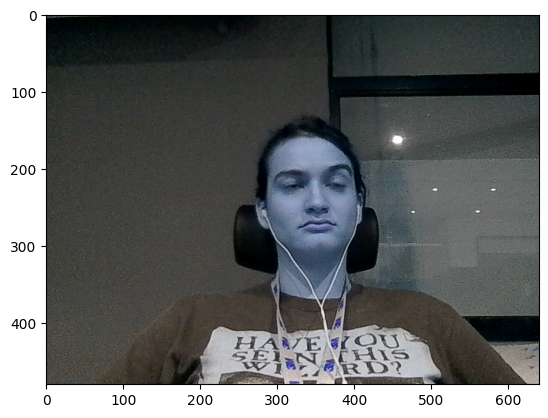

In [94]:
import matplotlib.pyplot as plt
ret, frame = captura.read()
gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_alt.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 2)
plt.imshow(frame)
captura.release()

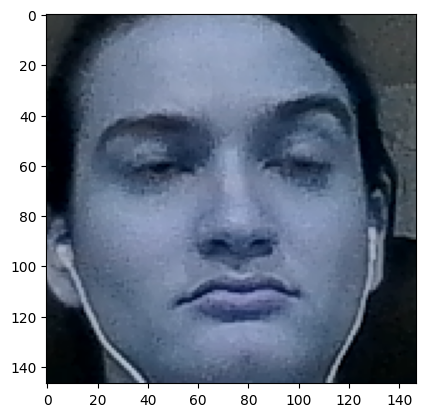

In [95]:

x,y,w,h = faces[0]
frame_ = frame[y:y+h, x:x+w, :] # y+ h e x+w
plt.imshow(frame_)

In [96]:
from utils import get_transform, accuracy, accuracy_julia
my_transforms = get_transform(train=False)
data = {
            'face': frame
        }
transformed_frame = my_transforms(data)


In [97]:
#type(frame_)
frame_torch = torch.asarray(transformed_frame["face"])
#frame_t = torch.from_numpy(frame_)
print(type(transformed_frame))

<class 'dict'>


In [98]:
#preds = model(frame_torch.to(device))
test_outs =[]
print(frame_torch.shape)
frame_torch = torch.unsqueeze(frame_torch, 0)
preds= model(frame_torch.to(device))
preds = preds.to('cpu')
print(preds)
emotion= []
emotion.extend(torch.argmax(preds, dim=1))
emotion=str(emotion[0].numpy())
print(emotion)
if emotion == 4 :
    lista_preds = preds[0].tolist()
    neutral=lista_preds[4]
    
    


torch.Size([3, 96, 96])
tensor([[-3.2925, -6.8439, -2.3046,  2.0382,  3.9194,  0.3441, -3.2214]],
       grad_fn=<ToCopyBackward0>)
4


In [99]:
lista_preds = preds[0].tolist()
print(lista_preds)

[-3.2924885749816895, -6.843939781188965, -2.304644823074341, 2.0382490158081055, 3.9193503856658936, 0.34406518936157227, -3.2214248180389404]


In [100]:
def set_emotion(label):

    if label == '0' :
        emotion = 'Angry'
    elif label == '1':
        emotion = 'Disgust'
    elif label == '2':
        emotion = 'Fear'
    elif label == '3':
        emotion = 'Happy'
    elif label == '4':
        emotion = 'Neutral'
    elif label == '5':
        emotion = 'Sad'
    elif label == '6':
        emotion = 'Surprise'
    return emotion


from urllib import request

def salvar_imagem(imagem, nome_arquivo, pasta):
    # Verifica se a pasta existe
    if not os.path.exists(pasta):
        # Cria a pasta se não existir
        os.makedirs(pasta)

    # Define o caminho completo para o arquivo
    caminho_arquivo = os.path.join(pasta, nome_arquivo)

    # Faz o download da imagem
    #request.urlretrieve(url, caminho_arquivo)
    cv.imwrite(caminho_arquivo,imagem)

    print(f'A imagem {nome_arquivo} foi salva em {pasta}.')

In [101]:
em_pred= set_emotion(emotion)
print(em_pred)
nome_arquivo = '13' + em_pred + ".png"
salvar_imagem(frame,nome_arquivo, 'webcam')
#more_lines =''
aux= ''
print(lista_preds)

with open('dados.txt', 'a') as f:
    for i in range(len(lista_preds)):
        aux = aux + str(lista_preds[i]) + ', '
    
    more_lines =  nome_arquivo + aux + ' '    
    f.write((more_lines)+'\n') 

Neutral
A imagem 13Neutral.png foi salva em webcam.
[-3.2924885749816895, -6.843939781188965, -2.304644823074341, 2.0382490158081055, 3.9193503856658936, 0.34406518936157227, -3.2214248180389404]
